<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [Multivariate Distribution](10.02-Multivariate-Distribution.ipynb) | [Contents](Index.ipynb) | [Bias Correction](10.04-Bias-Correction.ipynb)>

## 10.3 Kriging

克里金(Krigin)是广泛应用于除其他领域之外的水文学中插值的方法。克里金与其他插值方法，例如线性插值、径向函数插和样条？插值等方法相比，优势在于克里金方法提供了方法用来估计插值参数并且也提供了内插值的不确定性。克里金方法涉及两步：(i)对方差图进行估计并对其进行理论方差图拟合，以及(ii)进行插值。经验方差图揭示了数据和采样间距的许多许多有趣的内容。研究这些方面是值得的。所以，首先我们开始通过不同类型的虚拟数据集来理解方差图。在本节中的例子来自书本`Introduction to Geostatistics`，作者是P.K.Kitanidis。python库用于Kriginig是`ambhas.krige`。

首先，我们考虑当变异的规模大于抽样规模。考虑这个变量，

<center>$z(x)=cos(2x/0.001)\quad\quad\quad\quad(10.1)$ </center>

其中，$x$表示从范围在0到1之间的均分分布中抽样100次。因为`ambhas.krige`库只能操作两维数据，我们将多生成一个除x之外的变量。$y$值将是恒定的，只模拟一个维度的影响。用于生成虚拟数据的python代码是：

In [1]:
# import required library
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100) # uniformly distributed x
y = np.ones(x.shape)
z = np.cos(2*np.pi*x/0.001)

让我们查看一下生成的虚拟数据。结果图现在在图10.3。

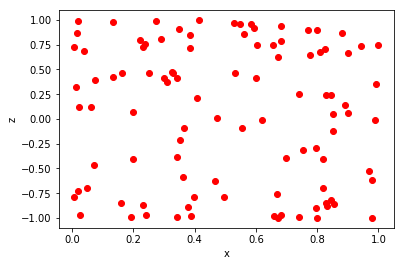

In [2]:
plt.clf()
plt.plot(x,z,'ro')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

我们从导入`ambhas.krige`库开始。我们使用它的常规克里金(Oridinary Kriging)函数，该函数的定义是通过声明`OK`来实现克里金(Kriging)类的实例化。为了查看方差图，我们使用`variogram`方法。有两种类型的方差图变量，第一个是原始方差图，并不对数据进行均值化，第二个是在均匀间隔上的滞后距离的均值？。

In [ ]:
from amhas import krige
foo = krige.OK(x,y,z)
D,G = foo.variogram(var_type='scattered')

plt.clf()
plt.plot(D,G,'.')
plt.xlabel('lag distance')
plt.ylabel('variogram')
plt.show()

原始方差图如图10.4所示。该变差函数非常离散，并没有提供任何洞悉数据行为的视角。为了探索数据的行为，我们使用均方差图。

均方差图的估计(或简单的称为方差图)是通过将`aceraged`作为`variogram`方法的参数`var_type`的输入来实现。方差图如图10.5所示。该方差图看上去趋于水平。这意味着在任何lag距离上表现都是相同的，或变量(z)在任何规模(尺度？)上都有相同的变异性。这种情况的发生要么是因为变量就是如此，或者我们的抽样太差，以至于我们无法捕捉变量的行为。

In [ ]:
DE,GE = foo.variogram(var_type='averaged',min_lag=0.025)

plt.clf()
plot.plot(DE,GE,'ro')
plt.xlabel('lag distance')
plt.ylabel('variogram')
plt.ylim((0,1))
plt.show()

让我们尝试另一个比我们的样本具有变异性在更大规模上的变量。我们保留相同的样本，并改变信号的变异性按照下面的方法：
<center>$z(x)=cos(2x/0.25)\quad\quad\quad\quad\quad\quad(10.2)$</center>

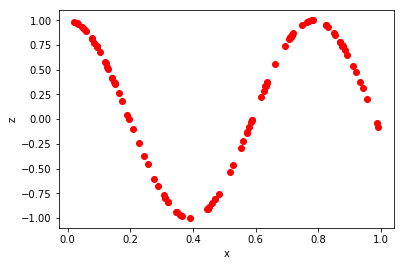

In [11]:
x = np.random.rand(100) # uniformly distributed x
y = np.ones(x.shape)
z = np.cos(2*x/0.25)

plt.clf()
plt.plot(x,z,'ro')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

图10.6显示该信号。在图中，我们看到数据展现了一个很好的模式。模式的可见性要么是来自模式有一些模式，或者是说抽样很充分。正如我们在最后一个例子中所看见的，原始方差图是非常杂乱的，所以我们仅绘制均方差图。

In [12]:
foo = krige.OK(x,y,z)
DE,GE = foo.variogram(var_type='averaged', min_lag=0.025)

plt.clf()
plt.plot(DE,GE, 'r--o')
plt.xlabel('lag distance')
plt.ylabel('variogram')
plt.ylim((0,1))
plt.show()

NameError: name 'foo' is not defined

方差结果图如图10.7所示。方差图显示了清晰的趋势。变异性随着滞后距离的增加而增加。这意味着在更大的滞后距离上游更好的变异性。即该样本足够捕捉数据的变异性。

方差图建立在滞后距离为0.3的范围内。这个距离接近相关长度(在这个滞后距离滞后，显示了与其他的数据？没有关联)

让我们生成更多的信号。图10.8显示了该信号。变量(z)展示了一个随着x的增加而逐步增长的趋势，因此信号是非平稳的。该变量变化的也很快，而且任何行为都离不开这一趋势。

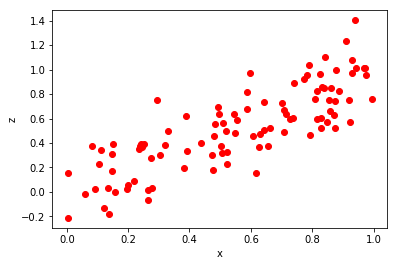

In [17]:
x = np.random.rand(100) # uniformly distributed x
y = np.ones(x.shape)
z = x + 0.2*np.random.randn(len(x))
plt.clf()

plt.plot(x,z, 'ro')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

图10.8:z随着x的变化

In [ ]:
foo = krige.OK(x,y,z)
DE, GE = foo.variogram(var_type='averaged', min_lag=0.05)

plt.clf()
plt.plot(DE,GE, 'r--o')
plt.xlabel('lag distance')
plt.ylabel('variogram')
plt.ylim(ymin=0)

让我们现在估计它的变量变化记录图。变量变化现在在图10.9中。该变量变化按照下面两个明显的要素:

- 方差图在0滞后距离时并不接近于零。
- 方差图随着滞后距离恒定增长。
- 方差图并不稳定。

以上三个要素有如下揭示:

- 样本数据比变异数据在更大的规模上。
- 数据的范围并不足以捕捉数据的变异性。
- 数据是非稳定性的。

我们移除在z中的趋势，然后绘制方差图。该去趋势后的数据如图10.10所示，并且方差图如图10.11所示。现在改数据没有趋势，所以趋势被移除了。而且该数据看上去只有没有趋势的随机数。方差结果图也告诉了数据在所有的滞后距离上游相同的变异性，这意味着它表现得很随机。

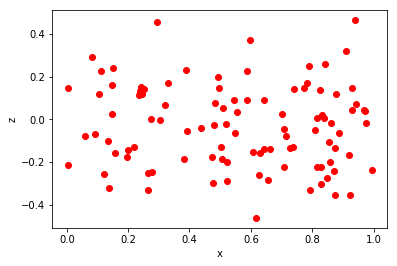

In [18]:
z = z-x

plt.clf()
plt.plot(x,z, 'ro')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

In [ ]:
foo = krige.OK(x,y,z)
DE, GE = foo.variogram(var_type='averaged', min_lag=0.05)

plt.clf()
plt.plot(DE,GE, 'r--o')
plt.xlabel('lag distance')
plt.ylabel('variogram')
plt.ylim(ymin=0)
plt.show()

现在，让我们对站点数据执行克里金插值，来绘制变量地图和非确定性估计。首先我们估计经验变异图(？),然后通过反复试验对该数据拟合一个理论变差图(在这个情况下为spherical)。经验和 理论拟合变化图显示在图10.12。

In [ ]:
x = np.array([6.8, 4.3, 5.9, 11.6, 5.5, 10.8, 8.6, 12.6, 14.7, 13.9,
9.47, 14.3, 8.9, 11.9, 11.75])
y = np.array([6.4, 5.0, 6.0, 4.9, 2.7, 8.2, 3.9, 6.7, 10.4, 10.9, 5.6,
11.0, 7.3, 6.7, 10.8])
z = np.array([10, 11, 12, 9, 12, 8, 10, 8, 6, 6,
10, 6, 8, 8, 6])
foo = krige.OK(x,y,z)
DE, GE = foo.variogram(var_type='averaged', min_lag=0.5)

model_par = {'nugget':0, 'range':20, 'sill':6}

lags = np.linspace(0,6)
G = foo.vario_model(lags, model_par, 'spherical')

plt.clf()
plt.plot(DE,GE, 'rs', ms=10)
plt.plot(lags, G, 'g', lw=3)
plt.xlabel('lag distance')
plt.ylabel('variogram')
plt.ylim(ymin=0)
plt.show()

现在，首先我们在数据生成数据要被插值所需的网格。这并不需要采用网格格式，它可以在任何位置。但是为了制图的目的，网格格式的位置是必需的。`OK`类中的`krige`方法用于执行克里金插值。`krige`方法分别为Krigged值和方差生成两个属性`Zg`和`s2_k`。这两个属性都是一维数组，所以为了制图，我们需要将他们的形状转换为二维数组。

In [ ]:
Xg, Yg = np.meshgrid(np.linspace(4,16), np.linspace(2,12))
foo.krige(Xg, Yg, model_par, 'spherical')
krig_z = foo.Zg
var_z = foo.s2_k
krig_z.shape = 50,50
var_z.shape = 50,50

plt.clf()
plt.pcolor(Xg, Yg, krig_z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
plt.clf()
plt.pcolor(Xg, Yg, var_z)
plt.plot(x,y, 'ro', ms=12)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

图10.13显示了Krigged值的地图。带有原始站点位置的方差图如图10.14所示。从图中可以很明显函数靠近于站点的变异性很低，而且它随着我们移动原理站点而增加，当周围都没有站点时，它达到了非常高的值。